#Telecom X - An치lisis de Evasi칩n de Clientes
**Autor: **Alexander Jamin Julon Mayta
**Fecha:** 02/08/2025

Resumen: Este an치lisis tiene como objetivo ayudar al Sr. Juan a decidir cu치l de sus cuatro tiendas de la cadena Alura Store deber칤a vender para iniciar un nuevo emprendimiento. A trav칠s del estudio de m칠tricas clave como ingresos, volumen de ventas, rese침as de clientes y eficiencia log칤stica, se identifican las fortalezas y debilidades de cada tienda. El an치lisis se apoya en visualizaciones claras y concluye con una recomendaci칩n basada en datos.

#游늷 Extracci칩n

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

archivo = 'https://github.com/AlekJulM/TelecomX_Data-science-LATAM/raw/refs/heads/main/TelecomX_Data.json'
datos = pd.read_json(archivo)


#游댢 Transformaci칩n

In [65]:
#normalizaci칩n de columnas con estructuras anidadas
columnas_json = datos.columns[2:]

df_final = pd.concat([
    datos.drop(columns=columnas_json),
    *[
        pd.json_normalize(datos[col])
        for col in columnas_json
    ]
], axis=1)
df_final.head()

customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... OnlineBackup  \
0          Yes            No             DSL  ...          Yes   
1          Yes           Yes             DSL  ...           No   
2          Yes            No     Fiber optic  ...           No   
3          Yes            No     Fiber optic  ...          Yes   
4          Yes            No     Fiber optic  ...           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No         Yes         Yes              No        One year   
1               No          No          No             Yes  Month-to-month   
2              Yes          No          No              No  Month-to-month   
3              Yes          No         Yes             Yes  Month-to-month   
4               No         Yes         Yes              No  Month-to-month   

  PaperlessBilling     PaymentMethod Charges.Monthly  Charges.Total  
0              Yes      Mailed check            65.6          593.3  
1               No      Mailed check            59.9          542.4  
2              Yes  Electronic check            73.9         280.85  
3              Yes  Electronic check            98.0        1237.85  
4              Yes      Mailed check            83.9          267.4  

[5 rows x 21 columns]

In [66]:
#Cuando los meses de contrato son 0, el cargo total es un espacio vacio, se remplazara por 0
df_final[df_final['Charges.Total'] == ' '][['tenure','Charges.Total']]
df_final['Charges.Total'] = df_final['Charges.Total'].str.replace(' ', '0')
df_final['Charges.Total'] = df_final['Charges.Total'].astype(np.float64)

In [67]:
#conviertiendo tipo de datos object a int
df_final['Partner'] = df_final['Partner'].replace({'Yes': 1, 'No': 0})
df_final['Partner'] = df_final['Partner'].astype('Int8')
df_final['Dependents'] = df_final['Dependents'].replace({'Yes': 1, 'No': 0})
df_final['Dependents'] = df_final['Dependents'].astype('Int8')
df_final['PhoneService'] = df_final['PhoneService'].replace({'Yes': 1, 'No': 0})
df_final['PhoneService'] = df_final['PhoneService'].astype('Int8')

/tmp/ipython-input-2431330518.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_final['Partner'] = df_final['Partner'].replace({'Yes': 1, 'No': 0})
/tmp/ipython-input-2431330518.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_final['Dependents'] = df_final['Dependents'].replace({'Yes': 1, 'No': 0})
/tmp/ipython-input-2431330518.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To o

In [68]:
#Creaci칩n de columa de tarifa diaria
df_final['Cuentas_Diarias'] = df_final['Charges.Monthly'] / 30
df_final.head()

customerID Churn  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  0002-ORFBO    No  Female              0        1           1       9   
1  0003-MKNFE    No    Male              0        0           0       9   
2  0004-TLHLJ   Yes    Male              0        0           0       4   
3  0011-IGKFF   Yes    Male              1        1           0      13   
4  0013-EXCHZ   Yes  Female              1        1           0       3   

   PhoneService MultipleLines InternetService  ... DeviceProtection  \
0             1            No             DSL  ...               No   
1             1           Yes             DSL  ...               No   
2             1            No     Fiber optic  ...              Yes   
3             1            No     Fiber optic  ...              Yes   
4             1            No     Fiber optic  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0         Yes         Yes              No        One year              Yes   
1          No          No             Yes  Month-to-month               No   
2          No          No              No  Month-to-month              Yes   
3          No         Yes             Yes  Month-to-month              Yes   
4         Yes         Yes              No  Month-to-month              Yes   

      PaymentMethod Charges.Monthly Charges.Total  Cuentas_Diarias  
0      Mailed check            65.6        593.30         2.186667  
1      Mailed check            59.9        542.40         1.996667  
2  Electronic check            73.9        280.85         2.463333  
3  Electronic check            98.0       1237.85         3.266667  
4      Mailed check            83.9        267.40         2.796667  

[5 rows x 22 columns]

In [86]:
#Valores faltantes
df_final['Churn'].value_counts()
a = len(df_final[df_final['Churn']== ''])/len(df_final)
a = round(a*100)
print(f"Se registra un {a} % de valores faltantes en la columna 'Churn'")

Se registra un 3% de valores faltantes en la columna 'Churn'


In [93]:
#Dado que el 3% es menos del umbral aceptable de valores faltantes, se optar치 por eliminar dichos registros
df_final['Churn'] = df_final['Churn'].replace({'Yes' : 1, 'No': 0, '': pd.NA})
df_final['Churn'].unique()
df_limpio = df_final.dropna(subset=['Churn'])
df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   Int8   
 5   Dependents        7043 non-null   Int8   
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   Int8   
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 
 17  

#游늵 Carga y an치lisis

In [132]:
df_limpio.describe()

SeniorCitizen   Partner  Dependents       tenure  PhoneService  \
count    7043.000000    7043.0      7043.0  7043.000000        7043.0   
mean        0.162147  0.483033    0.299588    32.371149      0.903166   
std         0.368612  0.499748     0.45811    24.559481      0.295752   
min         0.000000       0.0         0.0     0.000000           0.0   
25%         0.000000       0.0         0.0     9.000000           1.0   
50%         0.000000       0.0         0.0    29.000000           1.0   
75%         0.000000       1.0         1.0    55.000000           1.0   
max         1.000000       1.0         1.0    72.000000           1.0   

       Charges.Monthly  Charges.Total  Cuentas_Diarias  
count      7043.000000    7043.000000      7043.000000  
mean         64.761692    2279.734304         2.158723  
std          30.090047    2266.794470         1.003002  
min          18.250000       0.000000         0.608333  
25%          35.500000     398.550000         1.183333  
50%          70.350000    1394.550000         2.345000  
75%          89.850000    3786.600000         2.995000  
max         118.750000    8684.800000         3.958333

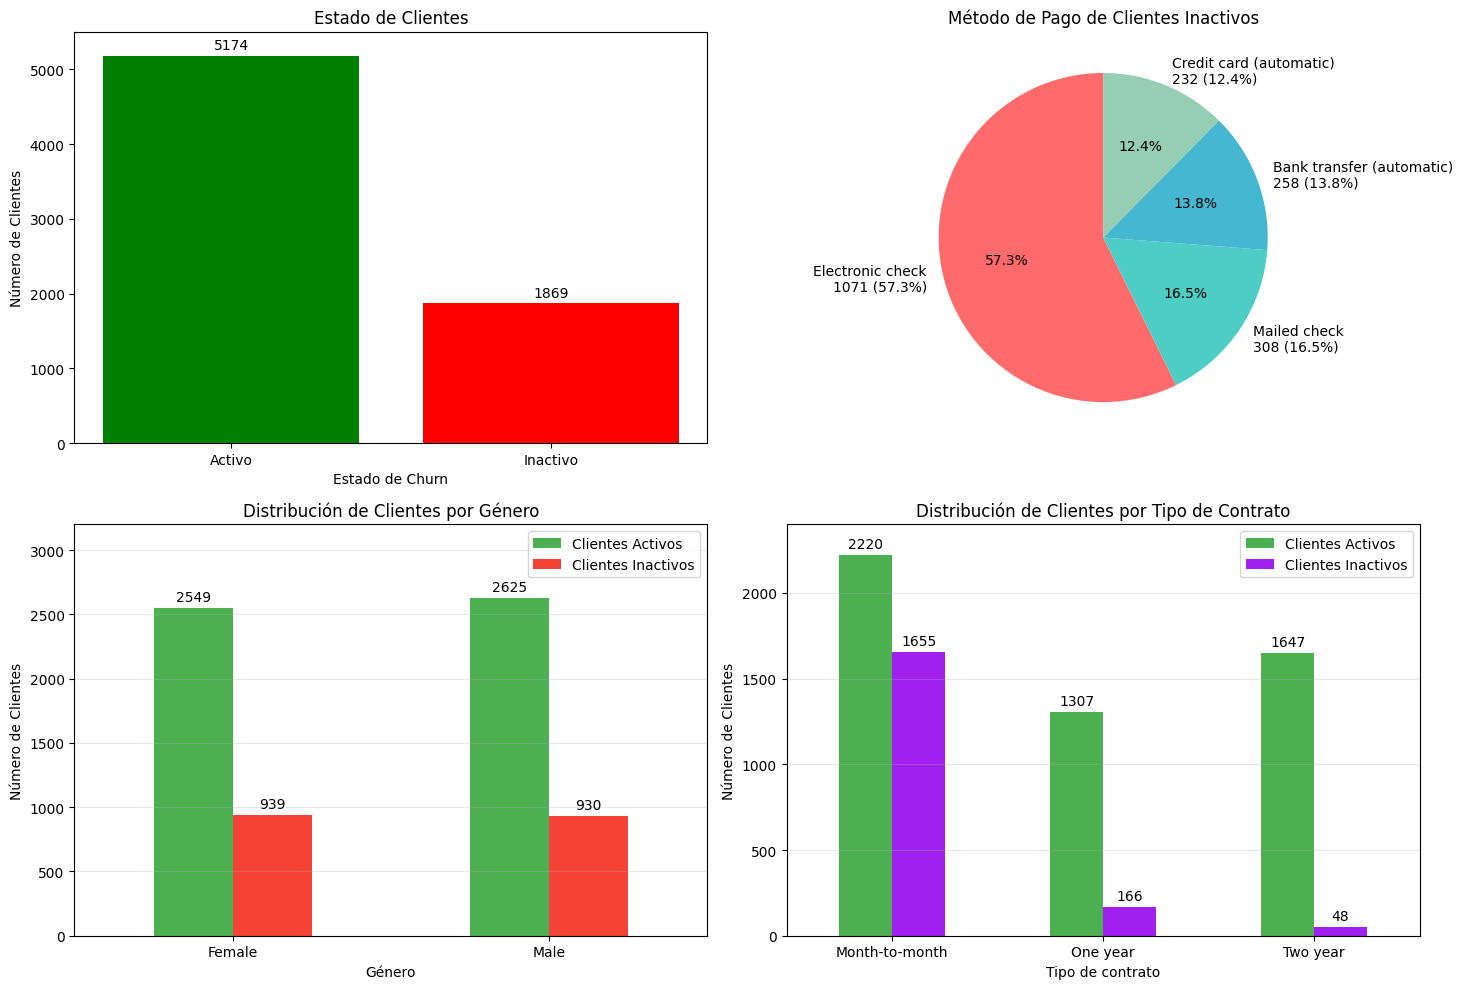

In [215]:
#@title Dashboard

fig, axes = plt.subplots(2,2, figsize=(15, 10))

#Grafico 1
churn_counts = df_limpio['Churn'].value_counts().sort_index()  # ordenar por 칤ndice
axes[0,0].bar(['Activo', 'Inactivo'],
               churn_counts.values,
               color=['green', 'red'])
axes[0,0].set_title('Estado de Clientes')
axes[0,0].set_ylabel('N칰mero de Clientes')
axes[0,0].set_ylim(0,5500)
axes[0,0].set_xlabel('Estado de Churn')
# N칰meros encima de las barras
for bar in axes[0,0].patches:
    axes[0,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50,
                   str(int(bar.get_height())), ha='center', va='bottom')

# Gr치fico 2: M칄TODO DE PAGO DE CLIENTES INACTIVOS (movido a posici칩n 0,1)
clientes_inactivos = df_limpio[df_limpio['Churn'] == 1]
metodo_inactivos = clientes_inactivos['PaymentMethod'].value_counts()

etiquetas = [f'{nombre}\n{valor} ({porcentaje:.1f}%)'
             for nombre, valor, porcentaje in zip(
                 metodo_inactivos.index,
                 metodo_inactivos.values,
                 (metodo_inactivos.values / metodo_inactivos.sum()) * 100)]

axes[0,1].pie(metodo_inactivos.values,
              labels=etiquetas,
              autopct='%1.1f%%',
              colors=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'],
              startangle=90)
axes[0,1].set_title('M칠todo de Pago de Clientes Inactivos')

# Gr치fico 3: DISTRIBUCI칍N POR G칄NERO (movido a posici칩n 1,0)
churn_gender = pd.crosstab(df_limpio['gender'], df_limpio['Churn'])
churn_gender.plot(kind='bar',
                  color=['#4CAF50', '#F44336'],
                  ax=axes[1,0])
axes[1,0].set_title('Distribuci칩n de Clientes por G칠nero')
axes[1,0].set_xlabel('G칠nero')
axes[1,0].set_ylabel('N칰mero de Clientes')
axes[1,0].set_ylim(0,3200)
axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(), rotation=0)
axes[1,0].legend(['Clientes Activos', 'Clientes Inactivos'])
axes[1,0].grid(axis='y', alpha=0.3)
# N칰meros encima de las barras
for container in axes[1,0].containers:
    axes[1,0].bar_label(container, padding=3)

# Gr치fico 4: DISTRIBUCI칍N POR CONTRATO (movido a posici칩n 1,1)
churn_contract = pd.crosstab(df_limpio['Contract'], df_limpio['Churn'])
churn_contract.plot(kind='bar',
                    color=['#4CAF50','#A020F0'],
                    ax=axes[1,1])
axes[1,1].set_title('Distribuci칩n de Clientes por Tipo de Contrato')
axes[1,1].set_xlabel('Tipo de contrato')
axes[1,1].set_ylabel('N칰mero de Clientes')
axes[1,1].set_ylim(0,2400)
axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(), rotation=0)
axes[1,1].legend(['Clientes Activos', 'Clientes Inactivos'])
axes[1,1].grid(axis='y', alpha=0.3)
# N칰meros encima de las barras
for container in axes[1,1].containers:
    axes[1,1].bar_label(container, padding=3)

plt.tight_layout()
plt.show()

/tmp/ipython-input-1018600858.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = axes[0].boxplot(data_to_plot,


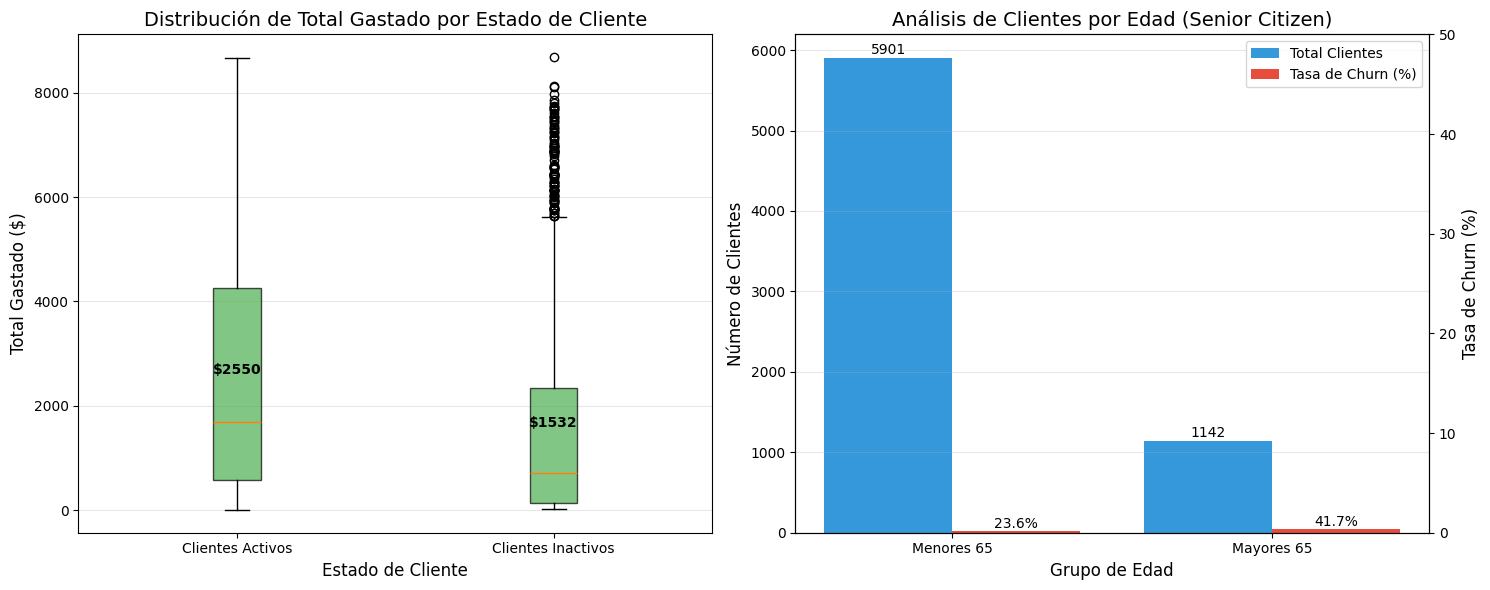

In [227]:
# Crear nueva figura para los dos gr치ficos anal칤ticos
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Gr치fico 1: Distribuci칩n de Total Gastado por Churn (Boxplot)
data_to_plot = [
    df_limpio[df_limpio['Churn'] == 0]['Charges.Total'].dropna(),  # Activos
    df_limpio[df_limpio['Churn'] == 1]['Charges.Total'].dropna()   # Inactivos
]

box_plot = axes[0].boxplot(data_to_plot,
               labels=['Clientes Activos', 'Clientes Inactivos'],
               patch_artist=True,
               boxprops=dict(facecolor='#4CAF50', alpha=0.7))

axes[0].set_title('Distribuci칩n de Total Gastado por Estado de Cliente', fontsize=14)
axes[0].set_ylabel('Total Gastado ($)', fontsize=12)
axes[0].set_xlabel('Estado de Cliente', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)

# Agregar estad칤sticas
for i, data in enumerate(data_to_plot):
    mean_val = data.mean()
    axes[0].text(i+1, mean_val, f'${mean_val:.0f}',
                ha='center', va='bottom', fontweight='bold')

# Gr치fico 2: An치lisis de Clientes Senior Citizen
senior_churn = df_limpio.groupby('SeniorCitizen')['Churn'].agg(['count', 'mean']).reset_index()
senior_churn['churn_rate'] = senior_churn['mean'] * 100

# Crear gr치fico de barras agrupadas
x = ['Menores 65', 'Mayores 65']
counts = senior_churn['count']
churn_rates = senior_churn['churn_rate']

# Gr치fico de barras dobles
bar1 = axes[1].bar([i - 0.2 for i in range(2)], counts,
                   width=0.4, label='Total Clientes', color='#3498db')
bar2 = axes[1].bar([i + 0.2 for i in range(2)], churn_rates,
                   width=0.4, label='Tasa de Churn (%)', color='#e74c3c')

axes[1].set_title('An치lisis de Clientes por Edad (Senior Citizen)', fontsize=14)
axes[1].set_xlabel('Grupo de Edad', fontsize=12)
axes[1].set_ylabel('N칰mero de Clientes', fontsize=12)
axes[1].set_xticks(range(2))
axes[1].set_xticklabels(x)
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

# Agregar valores encima de las barras
for i, (count, rate) in enumerate(zip(counts, churn_rates)):
    axes[1].text(i - 0.2, count + 10, str(count), ha='center', va='bottom')
    axes[1].text(i + 0.2, rate + 1, f'{rate:.1f}%', ha='center', va='bottom')

# Eje secundario para la tasa de churn
ax2 = axes[1].twinx()
ax2.set_ylabel('Tasa de Churn (%)', fontsize=12)
ax2.set_ylim(0, 50)

plt.tight_layout()
plt.show()



In [ ]:
# Datos
senior_stats = df_limpio.groupby('SeniorCitizen').agg({
    'Churn': ['count', 'mean'],
    'Charges.Total': 'mean',
    'tenure': 'mean'
}).round(2)

senior_stats.columns = ['Total_Clientes', 'Tasa_Churn', 'Promedio_Gasto', 'Promedio_Tenure']
senior_stats.index = ['Menores_65', 'Mayores_65']

# Gr치fico
x = np.arange(len(senior_stats))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

# Barras para Total de Clientes
rects1 = ax.bar(x - width/2, senior_stats['Total_Clientes'], width, label='Total Clientes', color='#3498db')

# Eje secundario para Tasa de Churn
ax2 = ax.twinx()
rects2 = ax2.bar(x + width/2, senior_stats['Tasa_Churn'] * 100, width, label='Tasa de Churn (%)', color='#e74c3c')

# Configuraci칩n del gr치fico
ax.set_title('An치lisis de Clientes por Edad (Senior Citizen)', fontsize=14)
ax.set_xlabel('Grupo de Edad', fontsize=12)
ax.set_ylabel('N칰mero de Clientes', fontsize=12)
ax2.set_ylabel('Tasa de Churn (%)', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(['Menores 65', 'Mayores 65'])

# Agregar leyendas
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

# Agregar valores encima de las barras
def autolabel(rects, ax, labels):
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.annotate(f'{label:.1f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 puntos arriba de la barra
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1, ax, senior_stats['Total_Clientes'])
autolabel(rects2, ax2, senior_stats['Tasa_Churn'] * 100)

plt.tight_layout()
plt.show()

#游늯Informe final

In [ ]:
# Datos
senior_stats = df_limpio.groupby('SeniorCitizen').agg({
    'Churn': ['count', 'mean'],
    'Charges.Total': 'mean',
    'tenure': 'mean'
}).round(2)

senior_stats.columns = ['Total_Clientes', 'Tasa_Churn', 'Promedio_Gasto', 'Promedio_Tenure']
senior_stats.index = ['Menores_65', 'Mayores_65']

# Gr치fico
fig, ax = plt.subplots(figsize=(10, 6))

# Barras horizontales para Total de Clientes
ax.barh(senior_stats.index, senior_stats['Total_Clientes'],
        color='#3498db', label='Total Clientes')

# Eje secundario para Tasa de Churn
ax2 = ax.twinx()
ax2.barh(senior_stats.index, senior_stats['Tasa_Churn'] * 100,
         color='#e74c3c', label='Tasa de Churn (%)')

# Configuraci칩n del gr치fico
ax.set_title('An치lisis de Clientes por Edad (Senior Citizen)', fontsize=14)
ax.set_xlabel('N칰mero de Clientes', fontsize=12)
ax2.set_xlabel('Tasa de Churn (%)', fontsize=12)
ax.set_yticklabels(['Menores 65', 'Mayores 65'])

# Agregar leyendas
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

# Agregar valores encima de las barras
def autolabel(rects, ax, labels):
    for rect, label in zip(rects, labels):
        width = rect.get_width()
        ax.annotate(f'{label:.1f}',
                    xy=(width, rect.get_y() + rect.get_height() / 2),
                    xytext=(3, 0),  # 3 puntos a la derecha de la barra
                    textcoords="offset points",
                    ha='left', va='center')

autolabel(ax.patches, ax, senior_stats['Total_Clientes'])
autolabel(ax2.patches, ax2, senior_stats['Tasa_Churn'] * 100)

plt.tight_layout()
plt.show()